# Assignment 3

## **1.**  Application on class data

In [1]:
#necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:
df= pd.read_csv('Intro to ML Class.csv')
df = df.drop(df.columns[0], axis=1)
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})
df.rename(columns={'Location: (0 Village, 1: Town, 2: City, 3: Megacity)': 'Location'}, inplace=True)
df

,Height,Weight,Gender,Age,Sporthours/week,Location
0,178.00,81,1,49,7,1
1,180.00,75,1,22,16,1
2,169.00,53,0,20,0,2
3,183.00,80,1,25,1,1
4,190.00,65,1,25,5,0
5,178.00,82,1,21,4,0
6,188.00,85,1,25,8,1
7,178.00,65,1,24,2,1
8,179.00,69,1,23,2,0
9,178.00,60,1,37,0,1


In [3]:
# response and variable
y = df["Weight"].to_numpy()
X = df.drop(df.columns[1], axis=1) # here i drop the column weight
print(X)
scaler = StandardScaler()
X= scaler.fit_transform(X)

    Height  Gender  Age  Sporthours/week  Location
0   178.00       1   49                7         1
1   180.00       1   22               16         1
2   169.00       0   20                0         2
3   183.00       1   25                1         1
4   190.00       1   25                5         0
5   178.00       1   21                4         0
6   188.00       1   25                8         1
7   178.00       1   24                2         1
8   179.00       1   23                2         0
9   178.00       1   37                0         1
10  175.00       1   26               10         1
11  177.00       0   20                7         1
12  173.00       1   23                2         0
13  164.00       0   28                2         1
14  170.00       1   29                5         1
15  170.00       0   24                3         0
16  169.00       1   23                2         1
17  165.00       1   20               10         0
18    1.69       0   20        

Note : I assume since we use another library than sklearn. That there is no need to do train test split. (I hope the library handles it in someway)

In [232]:
Xa = sm.add_constant(X)
model = sm.OLS(y, Xa)
results = model.fit() 
print(results.summary())
X

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     2.345
Date:                Mon, 14 Oct 2024   Prob (F-statistic):              0.100
Time:                        16:16:24   Log-Likelihood:                -63.782
No. Observations:                  19   AIC:                             139.6
Df Residuals:                      13   BIC:                             145.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.4737      1.926     35.550      0.0

/Users/borito/.pyenv/versions/3.10.7/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


array([[ 0.28850436,  0.5976143 ,  3.45547409,  0.57695306,  0.34299717],
       [ 0.33918702,  0.5976143 , -0.51020423,  2.81920243,  0.34299717],
       [ 0.0604324 , -1.67332005, -0.80395818, -1.16701868,  1.97223373],
       [ 0.41521101,  0.5976143 , -0.0695733 , -0.91787986,  0.34299717],
       [ 0.59260031,  0.5976143 , -0.0695733 ,  0.07867542, -1.28623939],
       [ 0.28850436,  0.5976143 , -0.6570812 , -0.1704634 , -1.28623939],
       [ 0.54191766,  0.5976143 , -0.0695733 ,  0.82609187,  0.34299717],
       [ 0.28850436,  0.5976143 , -0.21645028, -0.66874104,  0.34299717],
       [ 0.31384569,  0.5976143 , -0.36332725, -0.66874104, -1.28623939],
       [ 0.28850436,  0.5976143 ,  1.69295039, -1.16701868,  0.34299717],
       [ 0.21248038,  0.5976143 ,  0.07730367,  1.32436951,  0.34299717],
       [ 0.26316303, -1.67332005, -0.80395818,  0.57695306,  0.34299717],
       [ 0.16179772,  0.5976143 , -0.36332725, -0.66874104, -1.28623939],
       [-0.06627424, -1.67332005,  0.3

### Discussion:
i. We can see from the summary that we have an R-squared of 0.474. Since it is far from 1 we can conclude that the model doesn't explain very well the variability of the response. Looking at the F-statistic of 2.345 we see that it is close to 1, then we can say that the variables don't do a great job predicting the dependent variable.

ii. With a coefficient of 2.0467 it tells us that on average if you are a male you weight approximately 2 kg more than the females. But the p-value is quite high so the esttimation of the coefficient is not trustworthy, if we take a confidence interval of 95%.

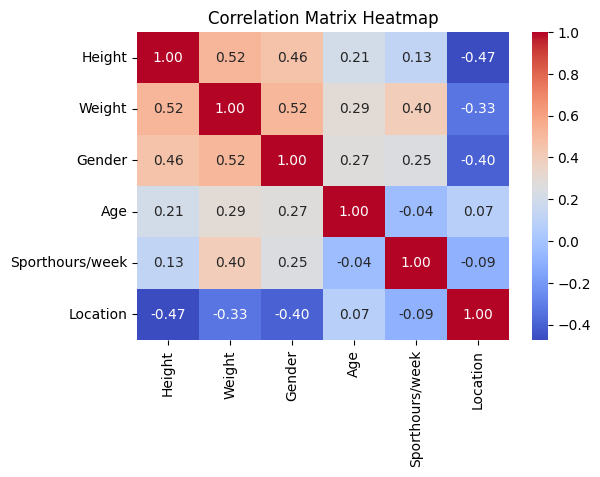

In [69]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

From this correlation heatmap we see that Height and Gender are the two variable that are most likely to be interesting when predicting the weight of someone form the class data.

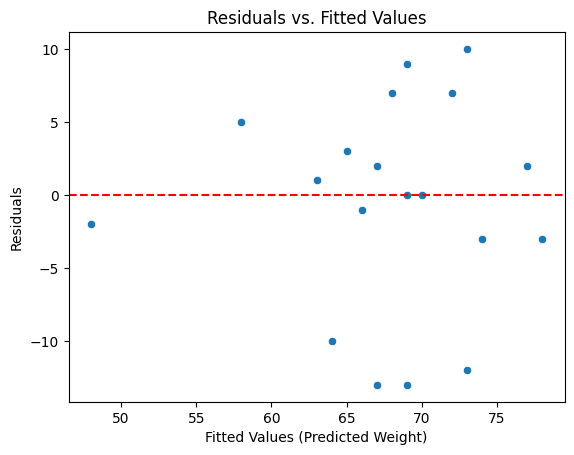

In [92]:
Z = y.copy()

for t in range(X.shape[0]):
    z = results.get_prediction(Xa[t])
    Z[t] = z.predicted_mean
residuals = (Z - y).reshape(-1)
sns.scatterplot(x=Z, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values (Predicted Weight)')
plt.ylabel('Residuals')
plt.show()

We can see that there is a lot of residuals that are not scattered around zero. We can see graphically that the model doesn't predict well the data. On the left we even see a point that is far from the others. It is potentially an outlier.

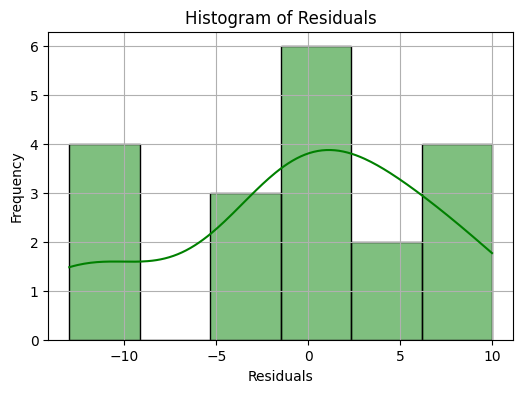

In [93]:
# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, color='green')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Here we see in the qq-plot that the residuals are close to follow a normal distribution.

<Figure size 1000x600 with 0 Axes>

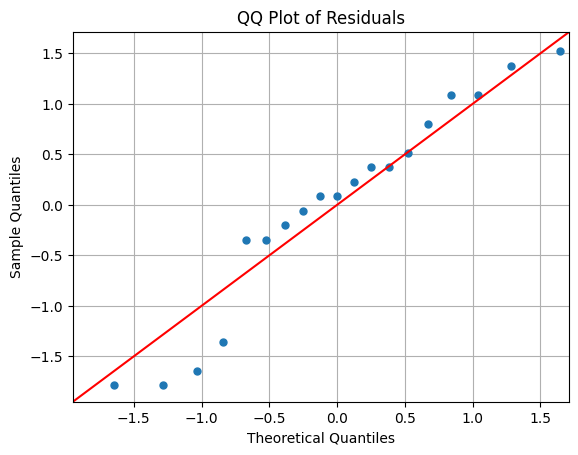

In [108]:
# QQ plot of residuals
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True, markersize=5)
plt.title('QQ Plot of Residuals')
plt.grid(True)
plt.show()

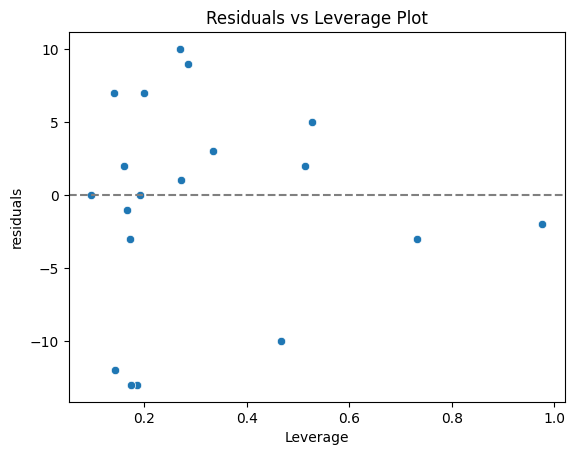

In [115]:
influence = results.get_influence()
leverage = influence.hat_matrix_diag
fig, ax = plt.subplots() 
sns.scatterplot(x=leverage, y=residuals) 
ax.axhline(y=0, color='grey', linestyle='dashed') 
ax.set_xlabel('Leverage') 
ax.set_ylabel('residuals') 
ax.set_title('Residuals vs Leverage Plot')
plt.show()


We see in this graph that there is one point with high leverage that may be an outlier. We have to be careful with the high residuals points too.

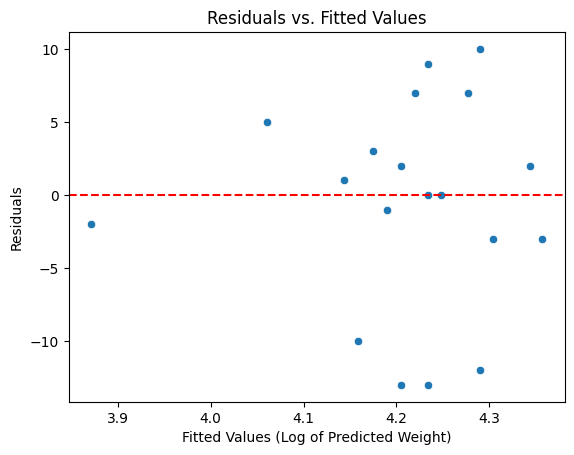

In [125]:
sns.scatterplot(x=np.log(Z), y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values (Log of Predicted Weight)')
plt.ylabel('Residuals')
plt.show()

The points are now a bit more close to eache other, but we can still detect a huge outlier. (This is due to the error of notation for some height value in the datasheet.)

## Simulated data

In [285]:
# We will use this class to generate the data
class DataGenerator:
    ## n_x: the dimensions of x
    ## n_y: the dimensions of y
    def __init__(self, n_x: int, n_y: int):
        self.n_x = n_x
        self.n_y = n_y
    ## n_data: the amount of data to generate 
    def generate(self, n_data):
        pass

In [317]:
# This class generates data from a linear model
class LinearModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma)$.
        self.Beta = np.full((n_x + 1, n_y), 2)
        self.sigma = np.random.gamma(1)
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.uniform(size=[n_data, self.n_x]) * (x_max - x_min) + x_min
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = np.append(X[t, :], 1)
            #print(self.Beta.shape, x.shape, np.dot(x, self.Beta))
            Y[t, :] = 1 - np.dot(x, self.Beta) + self.sigma * np.random.normal(size=[1, self.n_y])
            
        return X, Y

Generator from the demonstration.

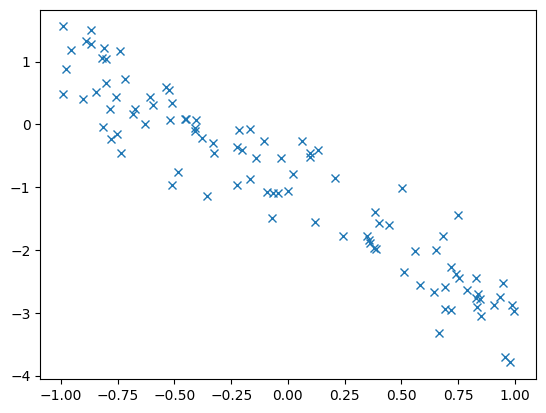

In [318]:
generator = LinearModelGenerator(1, 1)
generator.sigma = 0.5
X, y = generator.generate(100)
plt.plot(X, y, 'x')
plt.show()

We can see from the plot that there could be a linear relationship. With a negative slope. And it looks like something we wanted from the generation since our formula look like his : y = 1 - 2x + e

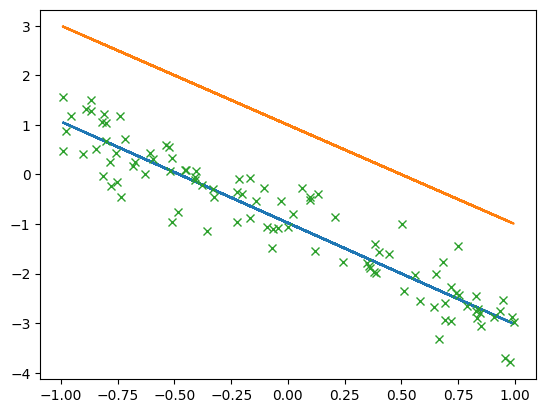

In [319]:
Xa = sm.add_constant(X)
model = sm.OLS(y, Xa)
results = model.fit() 
Z = y.copy()
residual = y.copy()
for t in range(Xa.shape[0]):
    z = results.get_prediction(Xa[t])
    Z[t] = z.predicted_mean

true = 1 - 2 * X    
plt.clf()
plt.plot(X, Z)
plt.plot(X, true)
plt.plot(X, y, 'x')
plt.show()

In [320]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     788.1
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.18e-48
Time:                        16:46:05   Log-Likelihood:                -62.509
No. Observations:                 100   AIC:                             129.0
Df Residuals:                      98   BIC:                             134.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9775      0.046    -21.384      0.0

we see that the coeff of B0 et B1 are very close to the true values. The linear model seems to be a good fit for this random dataset. Altough i don't know why B0 is negative.

In [339]:
# This class generates data from a linear model
class LinearModelGenerator(DataGenerator):
    def __init__(self, n_x: int, n_y: int):
        super().__init__(n_x, n_y)
        ## We use a matrix to generate data of the form
        ## $y = B x + \omega$, where $\omega \sim N(0, \sigma)$.
        self.Beta = np.full((n_x + 1, n_y), 2)
        self.sigma = np.random.gamma(1)
    def generate(self, n_data, x_min : float = -1, x_max : float = 1):
        X = np.random.normal(0, 1, size=[n_data, self.n_x])
        Y = np.zeros([n_data, self.n_x])
        for t in range(n_data):
            x = X[t, 0]
            #print(self.Beta.shape, x.shape, np.dot(x, self.Beta))
            Y[t, :] = 1 - np.dot(x, self.Beta) + self.sigma * np.random.normal(size=[1, self.n_y])
            
        return X, Y

In [341]:
generator = LinearModelGenerator(10, 1)
generator.sigma = 1
X, y = generator.generate(100)
plt.plot(X, y, 'x')
plt.show()

ValueError: could not broadcast input array from shape (11,1) into shape (10,)

Couldn't make work the code for 10 dim x and the final points of the assignment. But i think that the result would show how feeature B1 for example will influence the response variable. I imagine that Increase the number of points we'll see a better prediction of this influence. 